In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


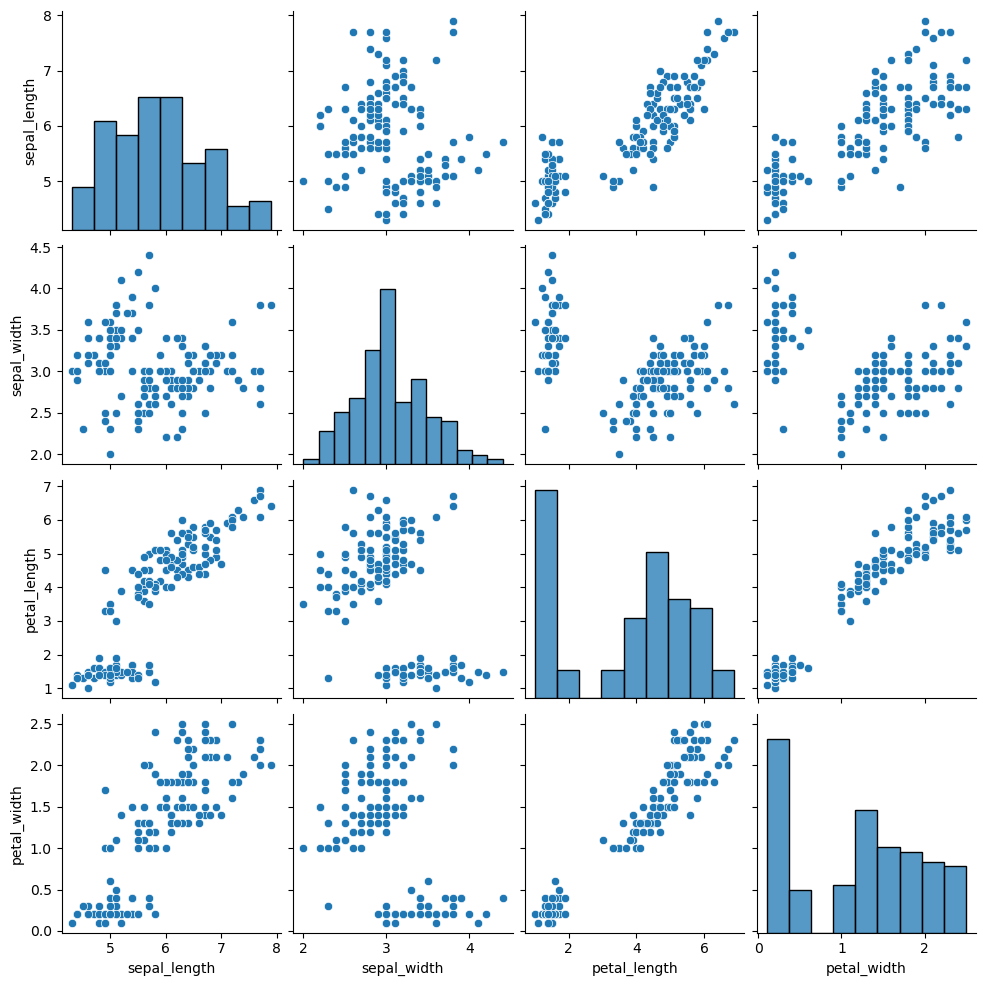

In [3]:
sns.pairplot(df)

In [4]:
#What does the distribution of petal lengths look like?
unique_petal_length = np.sort(df['petal_length'].unique())
unique_petal_length
#from 1 all the way to 6.9

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9])

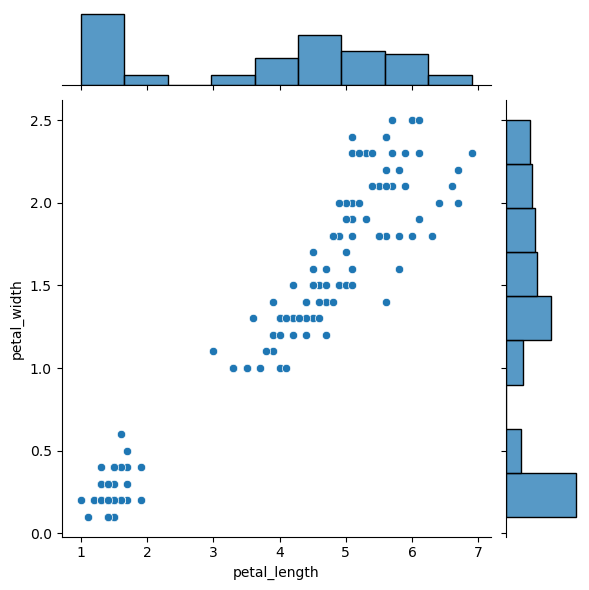

In [5]:
#is there a relationship between petal length and petal width?
sns.jointplot(data=df, x='petal_length', y='petal_width')
#this is a positive relationship since as the petal length increases so does the width
#This interpret as moderate positive correlation

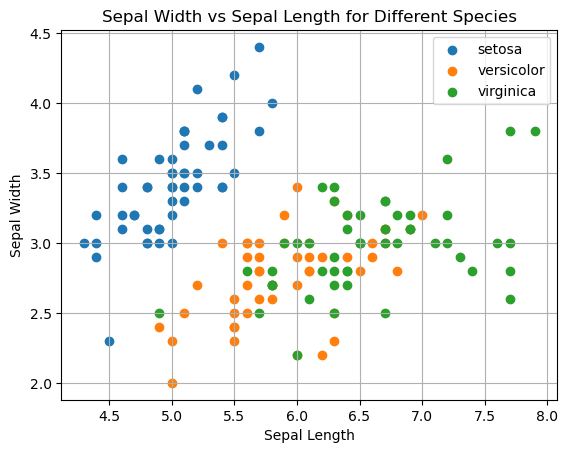

In [6]:
#would it be reasonable to predict species based on 
#sepal width and sepal length? 
#For this, you'll visualize two numeric columsn through the lense of
#a categorical column
species_list = df['species'].unique()

for species in species_list:
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length for Different Species')
plt.legend()
plt.grid(True)
plt.show()


#Which features would be best used to predict species?
Correlation Analysis: Calculate the correlation between 
    each feature and the target variable (species). 
    Features with higher absolute correlation values 
    are generally more important for prediction.

In [7]:
an=sns.load_dataset('anscombe')
an.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [8]:
an.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [9]:
group_column = an.groupby('dataset').describe()
group_column

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [10]:
#the count, mean, and standard deviation has the same value mean no variation or spread

<Axes: >

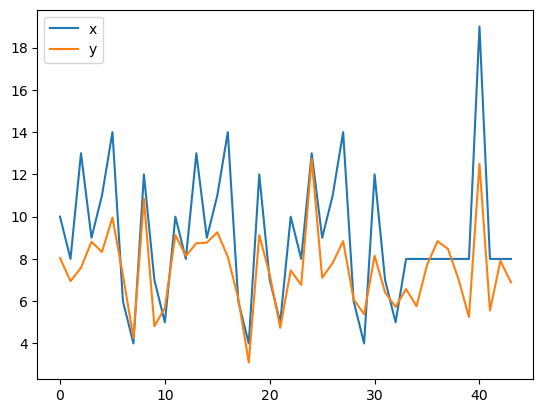

In [11]:
an.plot()

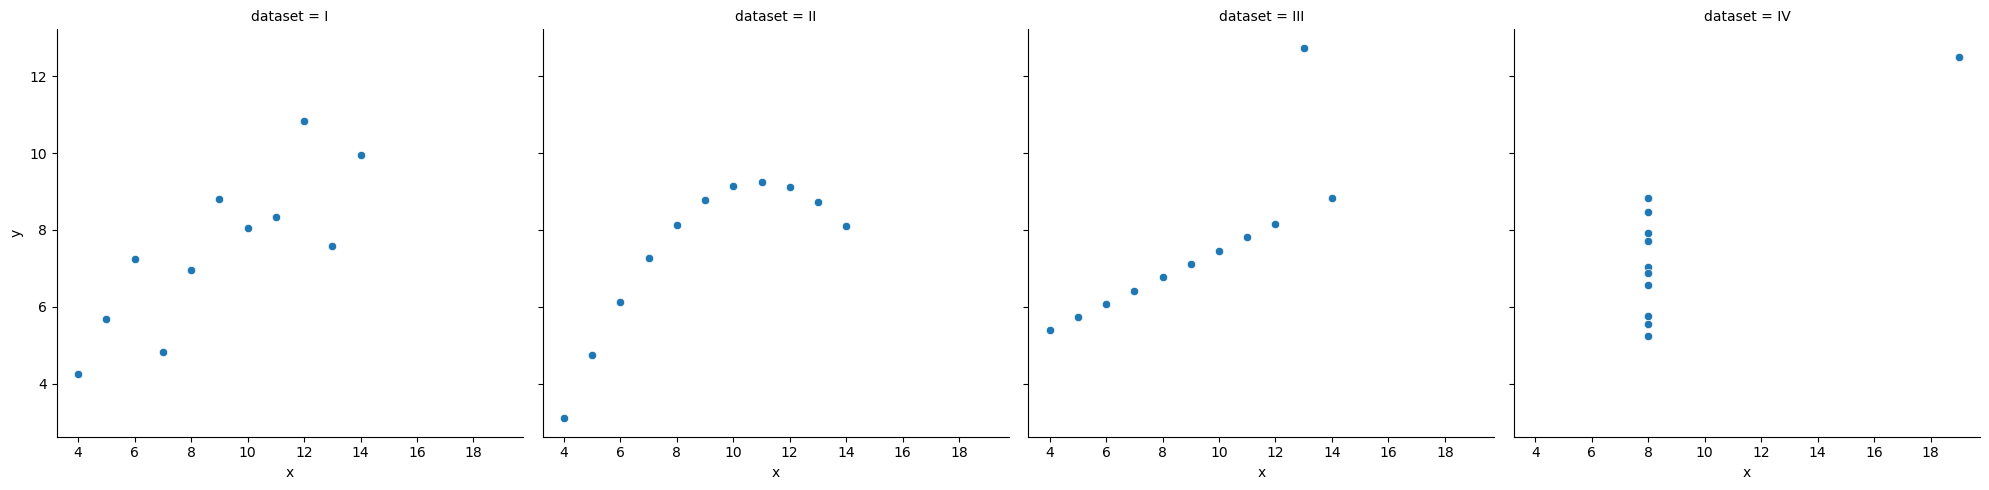

In [12]:
sns.relplot(data=an,x='x',y='y', col='dataset')

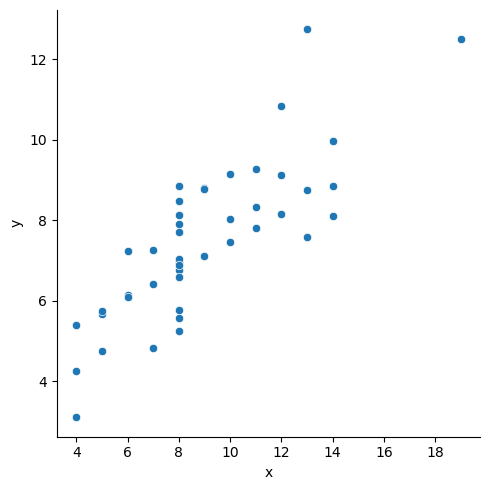

In [13]:
sns.relplot(data=an,x='x',y='y')

In [14]:
insect_sprays = data('InsectSprays')
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


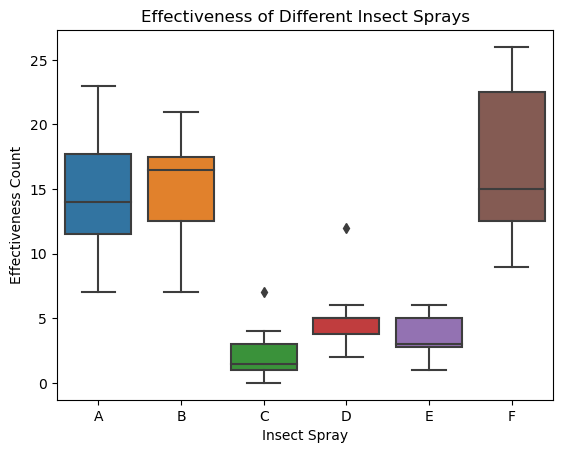

In [15]:
sns.boxplot(x='spray', y='count', data=insect_sprays)
plt.title('Effectiveness of Different Insect Sprays')
plt.xlabel('Insect Spray')
plt.ylabel('Effectiveness Count')
plt.show()

In [16]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [17]:

catholic_cutoff = 48
swiss['is_catholic'] = swiss['Catholic'] > catholic_cutoff

# Convert boolean values to strings
swiss['is_catholic'] = swiss['is_catholic'].replace({True: 'Catholic', False: 'Not Catholic'})

swiss.head()


#the new is_catholic in the swiss dataframe will tell if 
#catholics in that column is greater than 50%

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,Not Catholic
Delemont,83.1,45.1,6,9,84.84,22.2,Catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Catholic
Moutier,85.8,36.5,12,7,33.77,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,5.16,20.6,Not Catholic


Does whether or not a province is Catholic influence fertility? 
    

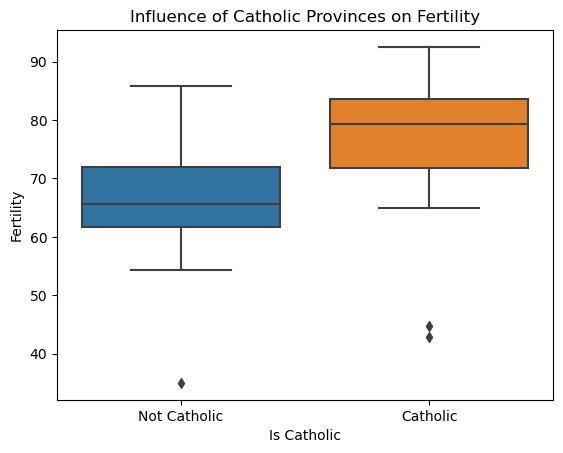

In [18]:


sns.boxplot(x='is_catholic', y='Fertility', data=swiss)
plt.title('Influence of Catholic Provinces on Fertility')
plt.xlabel('Is Catholic')
plt.ylabel('Fertility')
plt.show()


Base on this graph, Catholic provinces have more fertility

What measure correlates most strongly with fertility? 

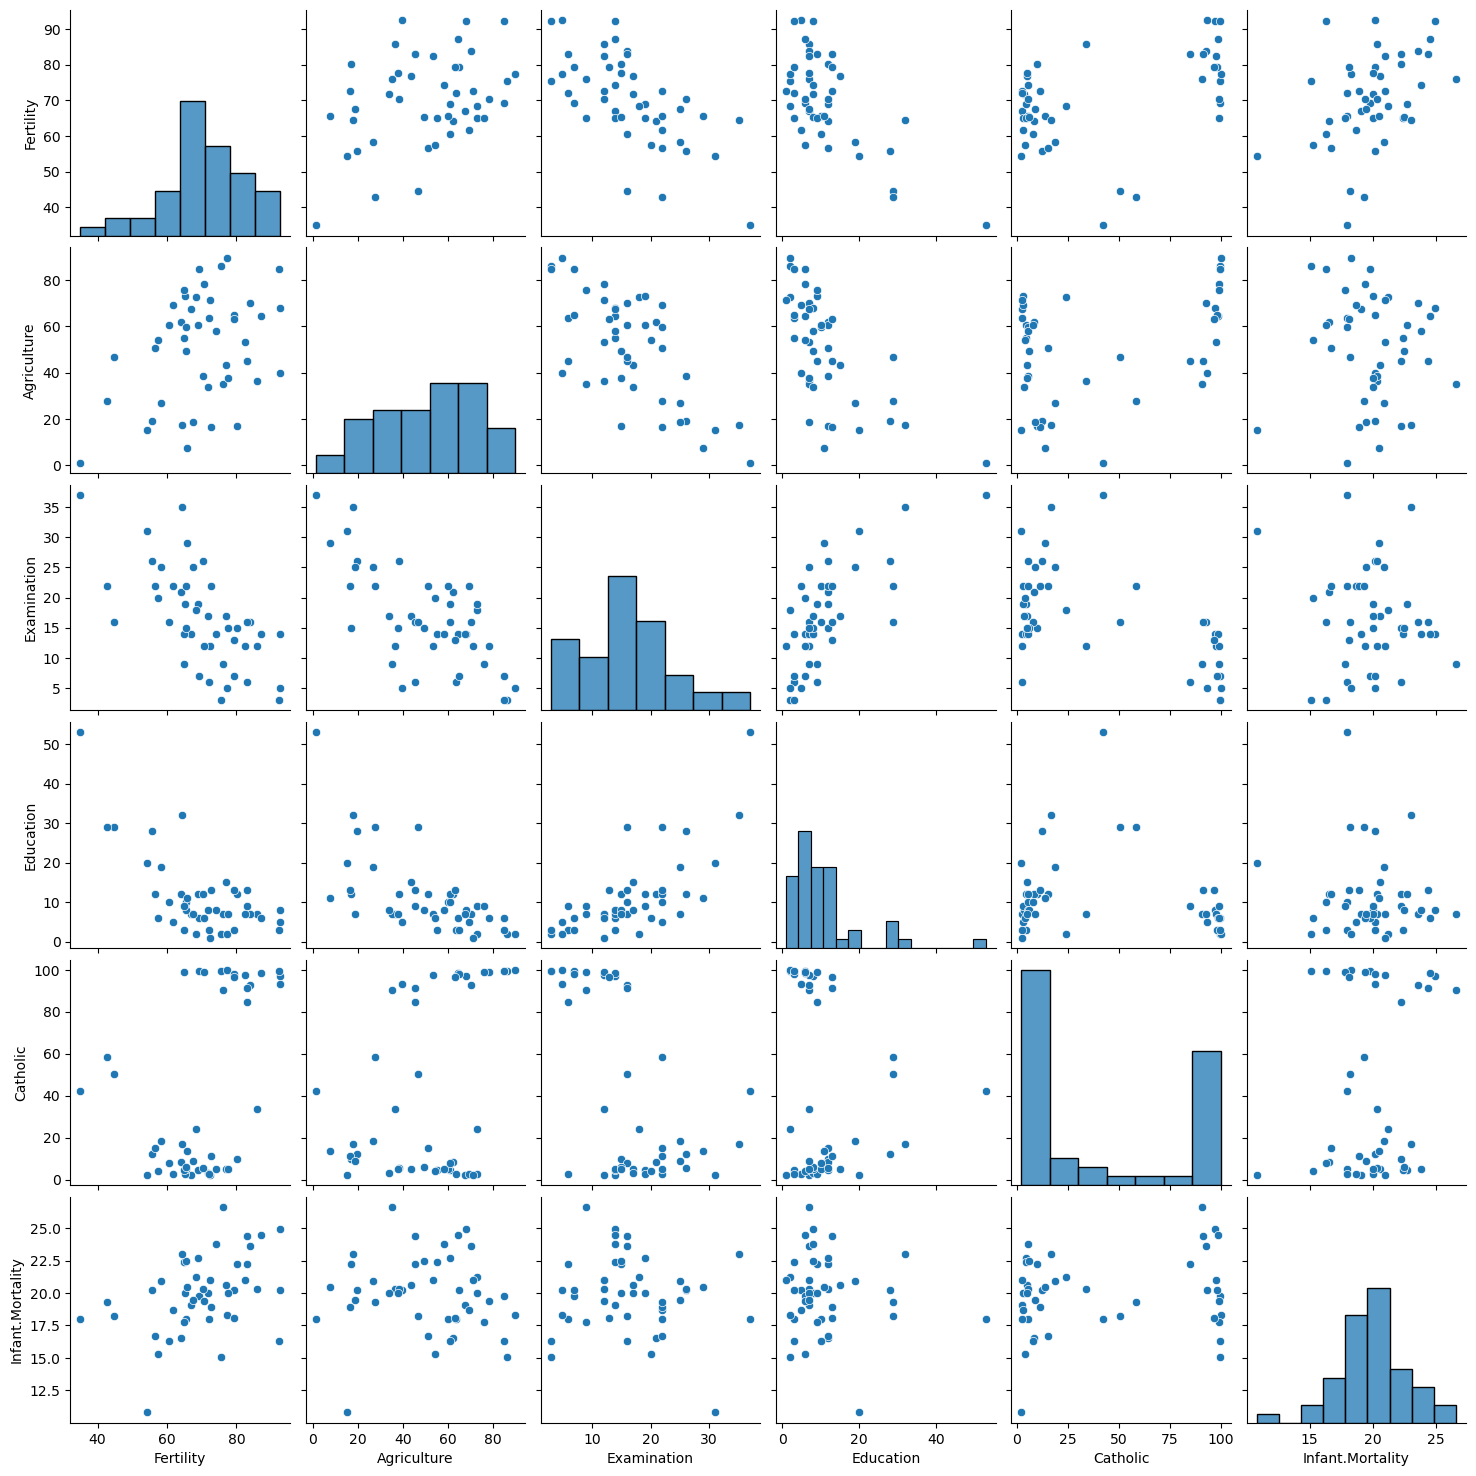

In [19]:
sns.pairplot(swiss)

Besides catholic, low education and low examination has a positive correlation on Fertility

In [20]:
chip = sns.load_dataset('chipotle')
chip.head()

ValueError: 'chipotle' is not one of the example datasets.